In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

2022-09-05 21:11:48.282061: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 21:11:48.282140: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split  

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/terminator/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/terminator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/terminator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/terminator/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data[data["Unnamed: 2"].str.len() > 0].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [7]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)


In [8]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data[data.duplicated()].head()

,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls


In [10]:
data[data.duplicated()].groupby('v1').count()

,v2
v1,
ham,309
spam,94


In [11]:
data.groupby('v1').describe().T

v1                            ham  \
v2 count                     4825   
   unique                    4516   
   top     Sorry, I'll call later   
   freq                        30   

v1                                                      spam  
v2 count                                                 747  
   unique                                                653  
   top     Please call our customer service representativ...  
   freq                                                    4

In [12]:
data.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [13]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
ham_msg = data[data.label =='ham']
spam_msg = data[data.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

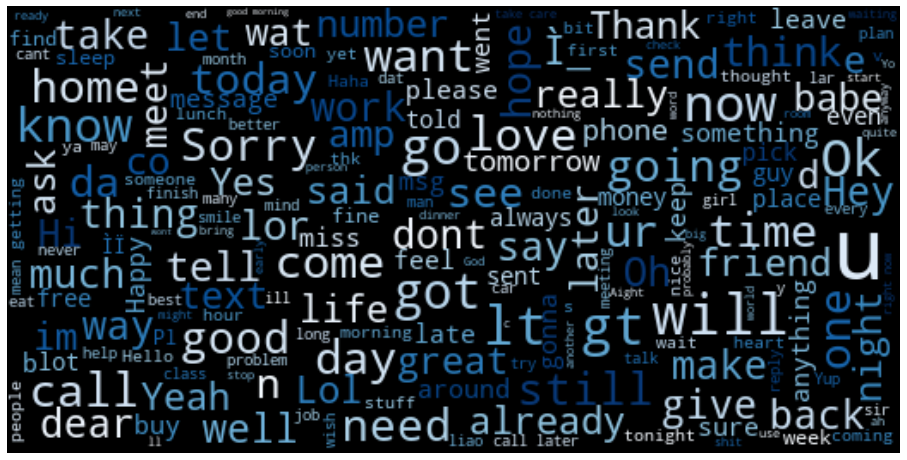

In [15]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

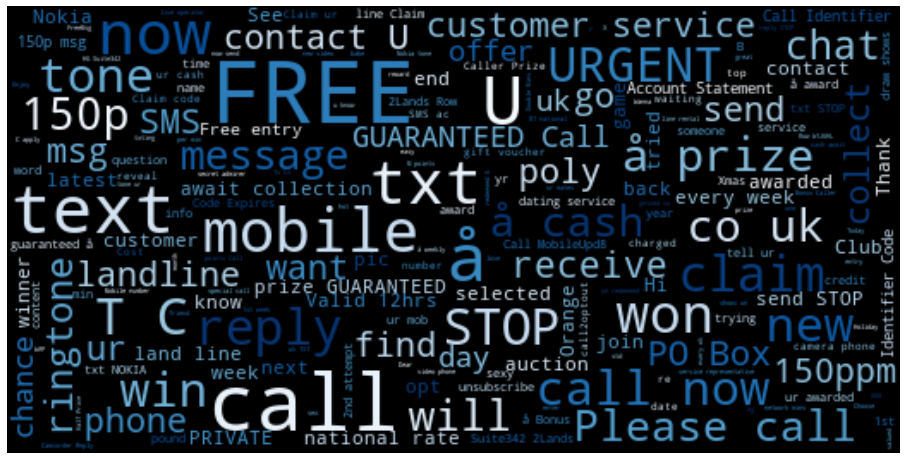

In [16]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

/home/terminator/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

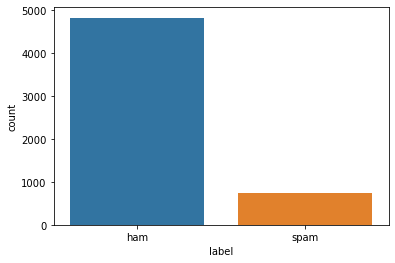

In [17]:
sns.countplot(data.label)

In [18]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 40)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


In [19]:
# Get length column for each text
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
msg_df['text_length'] = msg_df['message'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

/tmp/ipykernel_323/1586739693.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)


,text_length
label,
ham,72.722892
spam,138.866131


In [20]:
msg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        1494 non-null   object
 1   message      1494 non-null   object
 2   text_length  1494 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [21]:
def clean_words(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

msg_df["clean_text"] = msg_df["message"].apply(clean_words)
print(*msg_df["clean_text"][:5], sep = "\n")

from tomorrow onwards eve to work
never try alone to take the weight of a tear that comes out of ur heart and falls through ur eyes always remember a stupid friend is here to share bslvyl
and now electricity just went out fml
good afternoon starshine how s my boytoy does he crave me yet ache to fuck me sips cappuccino i miss you babe teasing kiss
u attend ur driving lesson how many times a wk n which day


In [22]:
msg_df['Tokenize_word'] = msg_df.apply(lambda row: nltk.word_tokenize(row['clean_text']),axis=1)

In [23]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word not in stop_words]

msg_df['stop_word'] = msg_df['Tokenize_word'].apply(remove_stopwords)

In [24]:
lemmaztizer = WordNetLemmatizer()
def lematize_word(text):
    return [lemmaztizer.lemmatize(word,pos='v') for word in text]

msg_df['lematize_text'] = msg_df['stop_word'].apply(lematize_word)

In [25]:
def append_message(text):
  str = " "
  return (str.join(text))
msg_df['processed_text'] = msg_df['lematize_text'].apply(append_message)

In [26]:
msg_df.head(1)

,label,message,text_length,clean_text,Tokenize_word,stop_word,lematize_text,processed_text
0,ham,From tomorrow onwards eve 6 to 3 work.,38,from tomorrow onwards eve to work,"[from, tomorrow, onwards, eve, to, work]","[tomorrow, onwards, eve, work]","[tomorrow, onwards, eve, work]",tomorrow onwards eve work


In [27]:
msg_df['label'] = msg_df['label'].replace(["ham","spam"],[0,1])

In [28]:
msg_df['label'].value_counts()

0    747
1    747
Name: label, dtype: int64

In [29]:
msg_df.head()

,label,message,text_length,clean_text,Tokenize_word,stop_word,lematize_text,processed_text
0,0,From tomorrow onwards eve 6 to 3 work.,38,from tomorrow onwards eve to work,"[from, tomorrow, onwards, eve, to, work]","[tomorrow, onwards, eve, work]","[tomorrow, onwards, eve, work]",tomorrow onwards eve work
1,0,Never try alone to take the weight of a tear t...,159,never try alone to take the weight of a tear t...,"[never, try, alone, to, take, the, weight, of,...","[never, try, alone, take, weight, tear, comes,...","[never, try, alone, take, weight, tear, come, ...",never try alone take weight tear come ur heart...
2,0,And now electricity just went out fml.,38,and now electricity just went out fml,"[and, now, electricity, just, went, out, fml]","[electricity, went, fml]","[electricity, go, fml]",electricity go fml
3,0,Good afternoon starshine! How's my boytoy? Doe...,131,good afternoon starshine how s my boytoy does ...,"[good, afternoon, starshine, how, s, my, boyto...","[good, afternoon, starshine, boytoy, crave, ye...","[good, afternoon, starshine, boytoy, crave, ye...",good afternoon starshine boytoy crave yet ache...
4,0,U attend ur driving lesson how many times a wk...,59,u attend ur driving lesson how many times a wk...,"[u, attend, ur, driving, lesson, how, many, ti...","[u, attend, ur, driving, lesson, many, times, ...","[u, attend, ur, drive, lesson, many, time, wk,...",u attend ur drive lesson many time wk n day


In [30]:
msg_df["length"]=msg_df["processed_text"].apply(len)

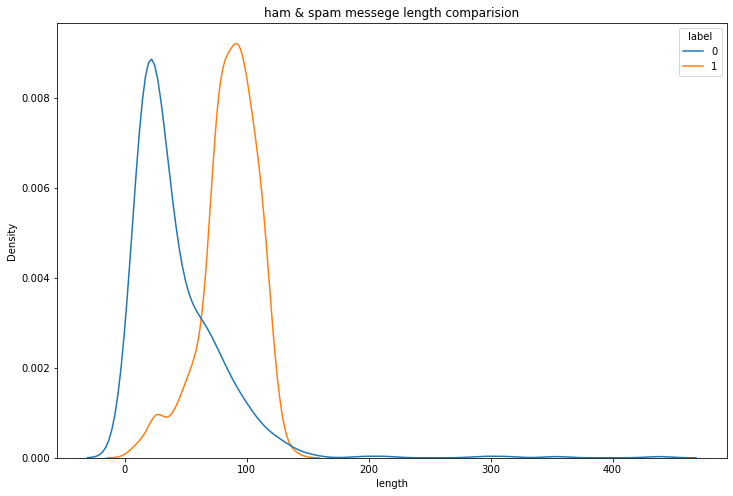

In [31]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=msg_df["length"],
    hue=msg_df["label"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [32]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [33]:
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['processed_text'], msg_df.label, test_size=0.2, random_state=434)

In [34]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [35]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences,maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [36]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [37]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [38]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

2022-09-05 21:12:00.299693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-05 21:12:00.300080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-05 21:12:00.300223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-05 21:12:00.300287: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-05 21:12:00.300344: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [40]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [41]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6902 - accuracy: 0.6577 - val_loss: 0.6865 - val_accuracy: 0.7090 - 860ms/epoch - 23ms/step
Epoch 2/30
38/38 - 0s - loss: 0.6811 - accuracy: 0.5874 - val_loss: 0.6703 - val_accuracy: 0.6789 - 85ms/epoch - 2ms/step
Epoch 3/30
38/38 - 0s - loss: 0.6568 - accuracy: 0.7766 - val_loss: 0.6363 - val_accuracy: 0.7860 - 82ms/epoch - 2ms/step
Epoch 4/30
38/38 - 0s - loss: 0.6106 - accuracy: 0.8318 - val_loss: 0.5785 - val_accuracy: 0.8662 - 105ms/epoch - 3ms/step
Epoch 5/30
38/38 - 0s - loss: 0.5432 - accuracy: 0.8795 - val_loss: 0.5019 - val_accuracy: 0.8997 - 84ms/epoch - 2ms/step
Epoch 6/30
38/38 - 0s - loss: 0.4587 - accuracy: 0.9088 - val_loss: 0.4193 - val_accuracy: 0.9164 - 80ms/epoch - 2ms/step
Epoch 7/30
38/38 - 0s - loss: 0.3721 - accuracy: 0.9188 - val_loss: 0.3453 - val_accuracy: 0.9231 - 90ms/epoch - 2ms/step
Epoch 8/30
38/38 - 0s - loss: 0.3041 - accuracy: 0.9347 - val_loss: 0.2774 - val_accuracy: 0.9298 - 89ms/epoch - 2ms/step
Epoch 9/30
38/38 - 0s

In [42]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9699


[0.10388971865177155, 0.9698996543884277]

In [43]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [44]:
def plott(value1,value2,message):
    epochs = range(1,len(value1)+1)
    plt.plot(epochs,value1, 'r',label=message[0])
    plt.plot(epochs,value2, 'g' ,label =message[1])
    plt.title(message[2])
    plt.xlabel('epochs')
    plt.ylabel(message[3])
    plt.legend()

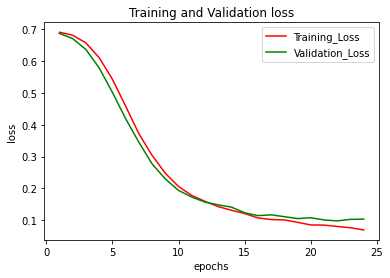

In [45]:
plott(history.history['loss'],history.history['val_loss'],['Training_Loss', 'Validation_Loss','Training and Validation loss' ,'loss'] )

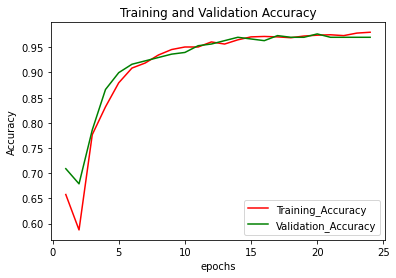

In [46]:
plott(history.history['accuracy'],history.history['val_accuracy'],['Training_Accuracy', 'Validation_Accuracy','Training and Validation Accuracy' ,'Accuracy'] )

In [47]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

In [48]:
#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [49]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            8000      
                                                                 
 lstm (LSTM)                 (None, 50, 20)            2960      
                                                                 
 lstm_1 (LSTM)               (None, 50, 20)            3280      
                                                                 
 dense_2 (Dense)             (None, 50, 1)             21        
                                                                 
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


In [50]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [51]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6804 - accuracy: 0.5670 - val_loss: 0.6026 - val_accuracy: 0.7002 - 6s/epoch - 166ms/step
Epoch 2/30
38/38 - 2s - loss: 0.3483 - accuracy: 0.8736 - val_loss: 0.2770 - val_accuracy: 0.9252 - 2s/epoch - 41ms/step
Epoch 3/30
38/38 - 2s - loss: 0.2262 - accuracy: 0.9362 - val_loss: 0.2167 - val_accuracy: 0.9410 - 2s/epoch - 40ms/step
Epoch 4/30
38/38 - 2s - loss: 0.1829 - accuracy: 0.9502 - val_loss: 0.2088 - val_accuracy: 0.9347 - 2s/epoch - 56ms/step
Epoch 5/30
38/38 - 2s - loss: 0.1723 - accuracy: 0.9530 - val_loss: 0.1967 - val_accuracy: 0.9469 - 2s/epoch - 64ms/step
Epoch 6/30
38/38 - 2s - loss: 0.1585 - accuracy: 0.9551 - val_loss: 0.1885 - val_accuracy: 0.9501 - 2s/epoch - 64ms/step
Epoch 7/30
38/38 - 2s - loss: 0.1433 - accuracy: 0.9584 - val_loss: 0.1999 - val_accuracy: 0.9433 - 2s/epoch - 64ms/step
Epoch 8/30
38/38 - 2s - loss: 0.1488 - accuracy: 0.9574 - val_loss: 0.2015 - val_accuracy: 0.9431 - 2s/epoch - 64ms/step


In [52]:
# Model performance on test data 
model1.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 11ms/step - loss: 0.2015 - accuracy: 0.9431


[0.2014874815940857, 0.9431437849998474]

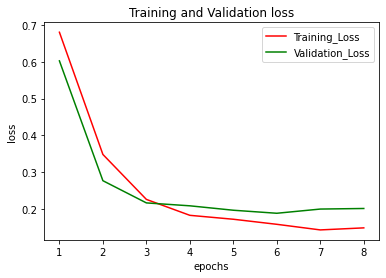

In [53]:
plott(history.history['loss'],history.history['val_loss'],['Training_Loss', 'Validation_Loss','Training and Validation loss' ,'loss'] )

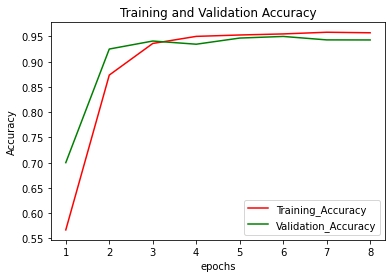

In [54]:
plott(history.history['accuracy'],history.history['val_accuracy'],['Training_Accuracy', 'Validation_Accuracy','Training and Validation Accuracy' ,'Accuracy'] )

In [55]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))

model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(16, activation='relu'))
model2.add(GlobalAveragePooling1D())
model2.add(Dense(1, activation='sigmoid'))

In [56]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [57]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            8000      
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 50, 16)            656       
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 14,593
Trainable params: 14,593
Non-trai

In [58]:
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 5s - loss: 0.6852 - accuracy: 0.5314 - val_loss: 0.6585 - val_accuracy: 0.6522 - 5s/epoch - 135ms/step
Epoch 2/30
38/38 - 1s - loss: 0.3923 - accuracy: 0.8962 - val_loss: 0.1959 - val_accuracy: 0.9431 - 1s/epoch - 37ms/step
Epoch 3/30
38/38 - 1s - loss: 0.1710 - accuracy: 0.9523 - val_loss: 0.1384 - val_accuracy: 0.9599 - 1s/epoch - 38ms/step
Epoch 4/30
38/38 - 1s - loss: 0.1245 - accuracy: 0.9649 - val_loss: 0.2467 - val_accuracy: 0.9431 - 1s/epoch - 37ms/step
Epoch 5/30
38/38 - 1s - loss: 0.1283 - accuracy: 0.9632 - val_loss: 0.1243 - val_accuracy: 0.9632 - 1s/epoch - 37ms/step
Epoch 6/30
38/38 - 1s - loss: 0.1021 - accuracy: 0.9724 - val_loss: 0.1679 - val_accuracy: 0.9565 - 1s/epoch - 34ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0894 - accuracy: 0.9757 - val_loss: 0.1217 - val_accuracy: 0.9666 - 1s/epoch - 38ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0845 - accuracy: 0.9766 - val_loss: 0.1386 - val_accuracy: 0.9599 - 1s/epoch - 36ms/step
Epoch 9/30
38/38 - 1s - loss: 0

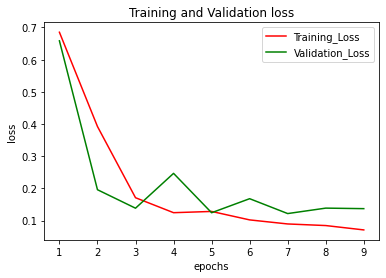

In [59]:
plott(history.history['loss'],history.history['val_loss'],['Training_Loss', 'Validation_Loss','Training and Validation loss' ,'loss'] )

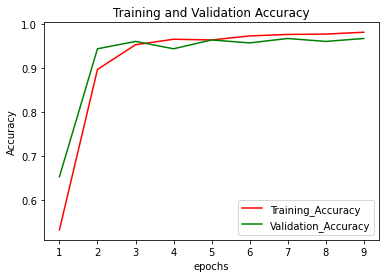

In [60]:
plott(history.history['accuracy'],history.history['val_accuracy'],['Training_Accuracy', 'Validation_Accuracy','Training and Validation Accuracy' ,'Accuracy'] )

In [61]:
# Comparing three different models
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_labels)} " )

10/10 [==============================] - 0s 2ms/step - loss: 0.1039 - accuracy: 0.9699
Dense architecture loss and accuracy: [0.10388971865177155, 0.9698996543884277] 
10/10 [==============================] - 0s 11ms/step - loss: 0.2015 - accuracy: 0.9431
LSTM architecture loss and accuracy: [0.2014874815940857, 0.9431437849998474] 
10/10 [==============================] - 0s 9ms/step - loss: 0.1370 - accuracy: 0.9666
Bi-LSTM architecture loss and accuracy: [0.1370178461074829, 0.9665551781654358] 


In [62]:
#generating a test sample
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [67]:
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
np.where(predict_spam(predict_msg)<0.5,0,1)

1/1 [==============================] - 0s 118ms/step


array([[0],
       [0],
       [1]])